In [55]:
from aeon.datasets import load_airline
from aeon.utils.plotting import plot_series
from matplotlib import pyplot as plt
import pandas as pd
from aeon.forecasting.naive import NaiveForecaster
import numpy as np
from aeon.forecasting.model_selection import temporal_train_test_split
from aeon.performance_metrics.forecasting import mean_absolute_percentage_error

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

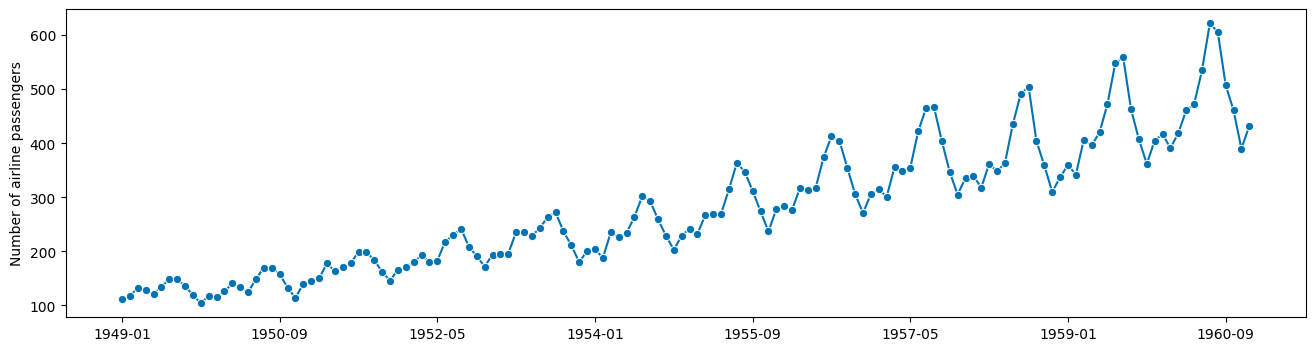

In [43]:
y = load_airline()
plot_series(y)

In [45]:
y_train, y_test = temporal_train_test_split(y, test_size=36)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

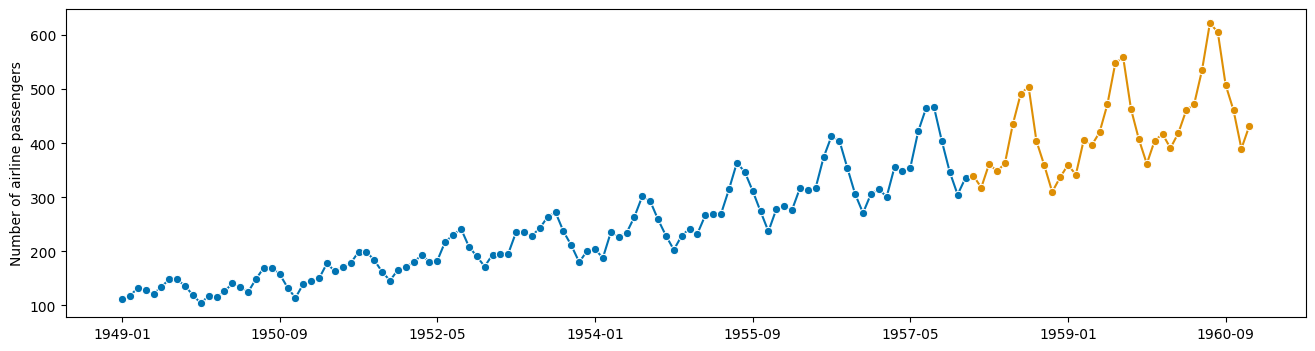

In [49]:
plot_series(y_train, y_test)

In [58]:
fh = np.arange(1,2)
print(fh)

[1]


In [59]:
forecaster = NaiveForecaster(strategy="last", sp=1)
forecaster.fit(y_train)
y_pred_1 = forecaster.predict(fh)

In [60]:
y_pred_1

1958-01    336.0
Freq: M, dtype: float64

In [61]:
y_test[:1]

Period
1958-01    340.0
Freq: M, Name: Number of airline passengers, dtype: float64

In [63]:
forecaster.update(y_test[:1])
y_pred_2 = forecaster.predict(fh)

C:\Users\nnnpo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\aeon\forecasting\base\_base.py:1875: UserWarning: NotImplementedWarning: NaiveForecaster does not have a custom `update` method implemented. NaiveForecaster will be refit each time `update` is called with update_params=True. To refit less often, use the wrappers in the forecasting.stream module, e.g., UpdateEvery.
  warn(


In [64]:
y_pred_1

1958-01    336.0
Freq: M, dtype: float64

In [65]:
y_pred_2

1958-02    340.0
Freq: M, dtype: float64

In [66]:
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

for i in range(0, y_test.shape[0] - 1):
    forecaster.update(y_test[i : i + 1])
    y_pred_temp = forecaster.predict(fh)
    y_pred = pd.concat([y_pred, y_pred_temp])

C:\Users\nnnpo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\aeon\forecasting\base\_base.py:1875: UserWarning: NotImplementedWarning: NaiveForecaster does not have a custom `update` method implemented. NaiveForecaster will be refit each time `update` is called with update_params=True. To refit less often, use the wrappers in the forecasting.stream module, e.g., UpdateEvery.
  warn(
C:\Users\nnnpo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\aeon\forecasting\base\_base.py:1875: UserWarning: NotImplementedWarning: NaiveForecaster does not have a custom `update` method implemented. NaiveForecaster will be refit each time `update` is called with update_params=True. To refit less often, use the wrappers in the forecasting.stream module, e.g., UpdateEvery.
  warn(
C:\Users\nnnpo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

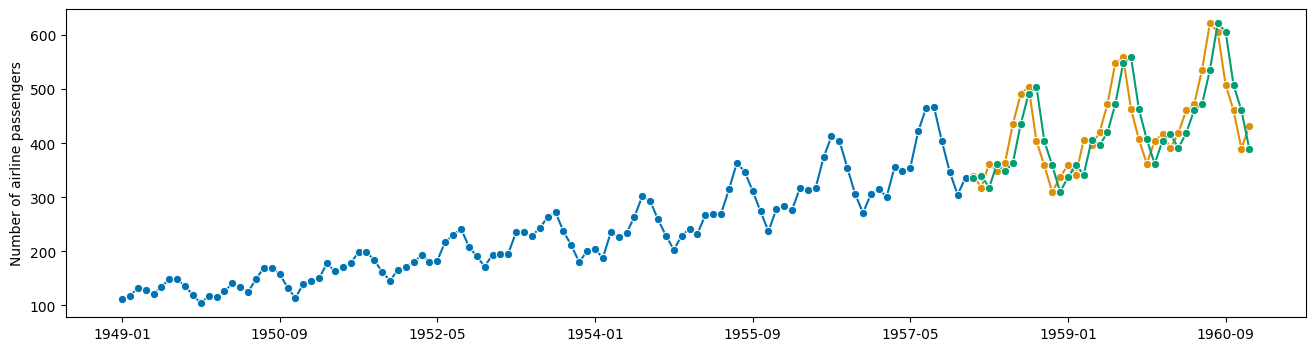

In [67]:
plot_series(y_train, y_test, y_pred)

In [68]:
mean_absolute_percentage_error(y_test, y_pred)

0.09833482876632028